<a href="https://colab.research.google.com/github/Dangeroust1tan/CISC-372-Group-7/blob/main/CISC372_Group_7_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements #

In [ ]:
!pip install datasets nltk textblob transformers scikit-learn scipy textstat xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requ

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from datasets import load_dataset
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

dataset = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023",
    "raw_review_All_Beauty",
    trust_remote_code=True,
    streaming=True
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

# Peek at the Dataset #

In [ ]:
# Initialize a list to store all reviews
reviews_list = []

# Iterate through the dataset and store all reviews
for review in dataset["full"]:
    reviews_list.append(review)

# Convert to DataFrame
df_reviews = pd.DataFrame(reviews_list)

# Display the first few rows
print(df_reviews.head())

   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588615855070  

In [ ]:
shape = df_reviews.shape
print(f"The shape of the dataset: {shape[0]} rows, and {shape[1]} columns!")

The shape of the dataset: 701528 rows, and 10 columns!


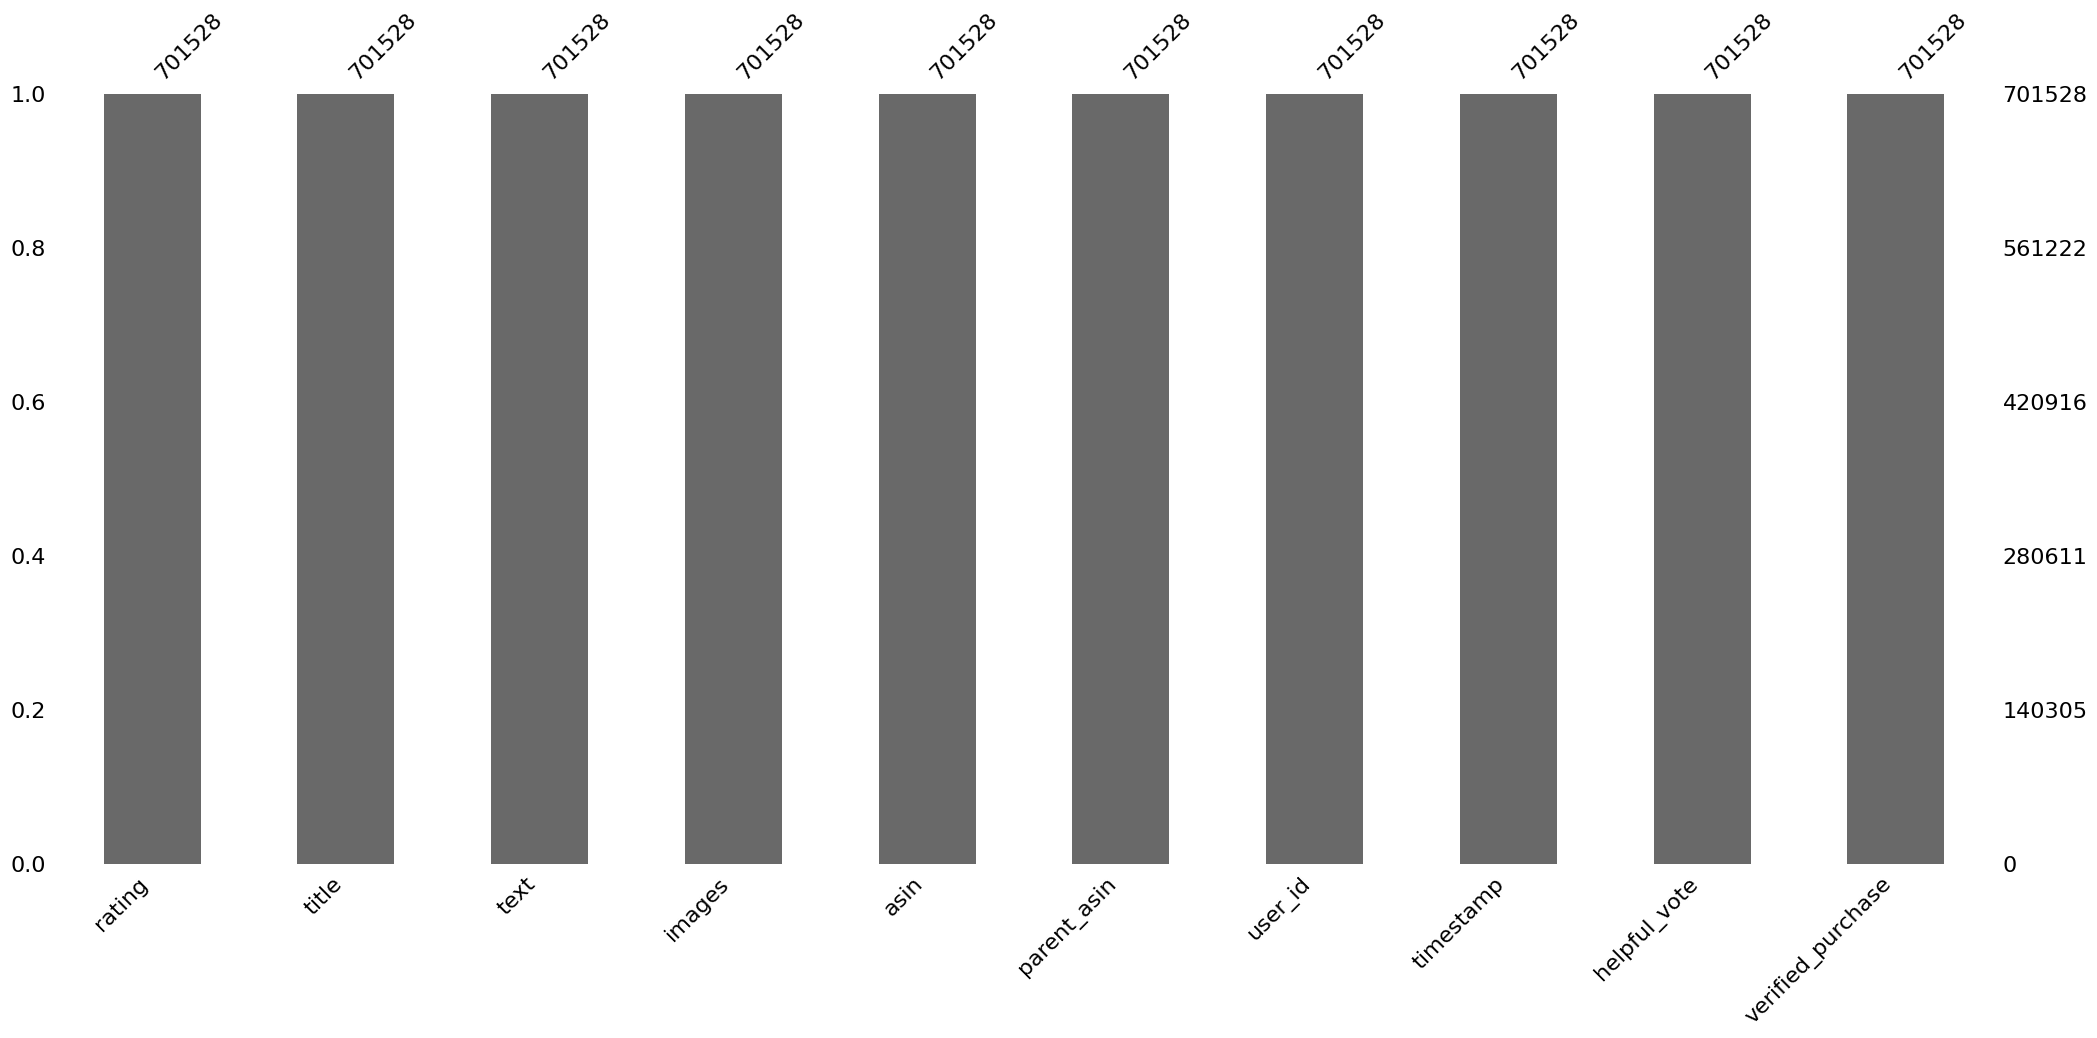

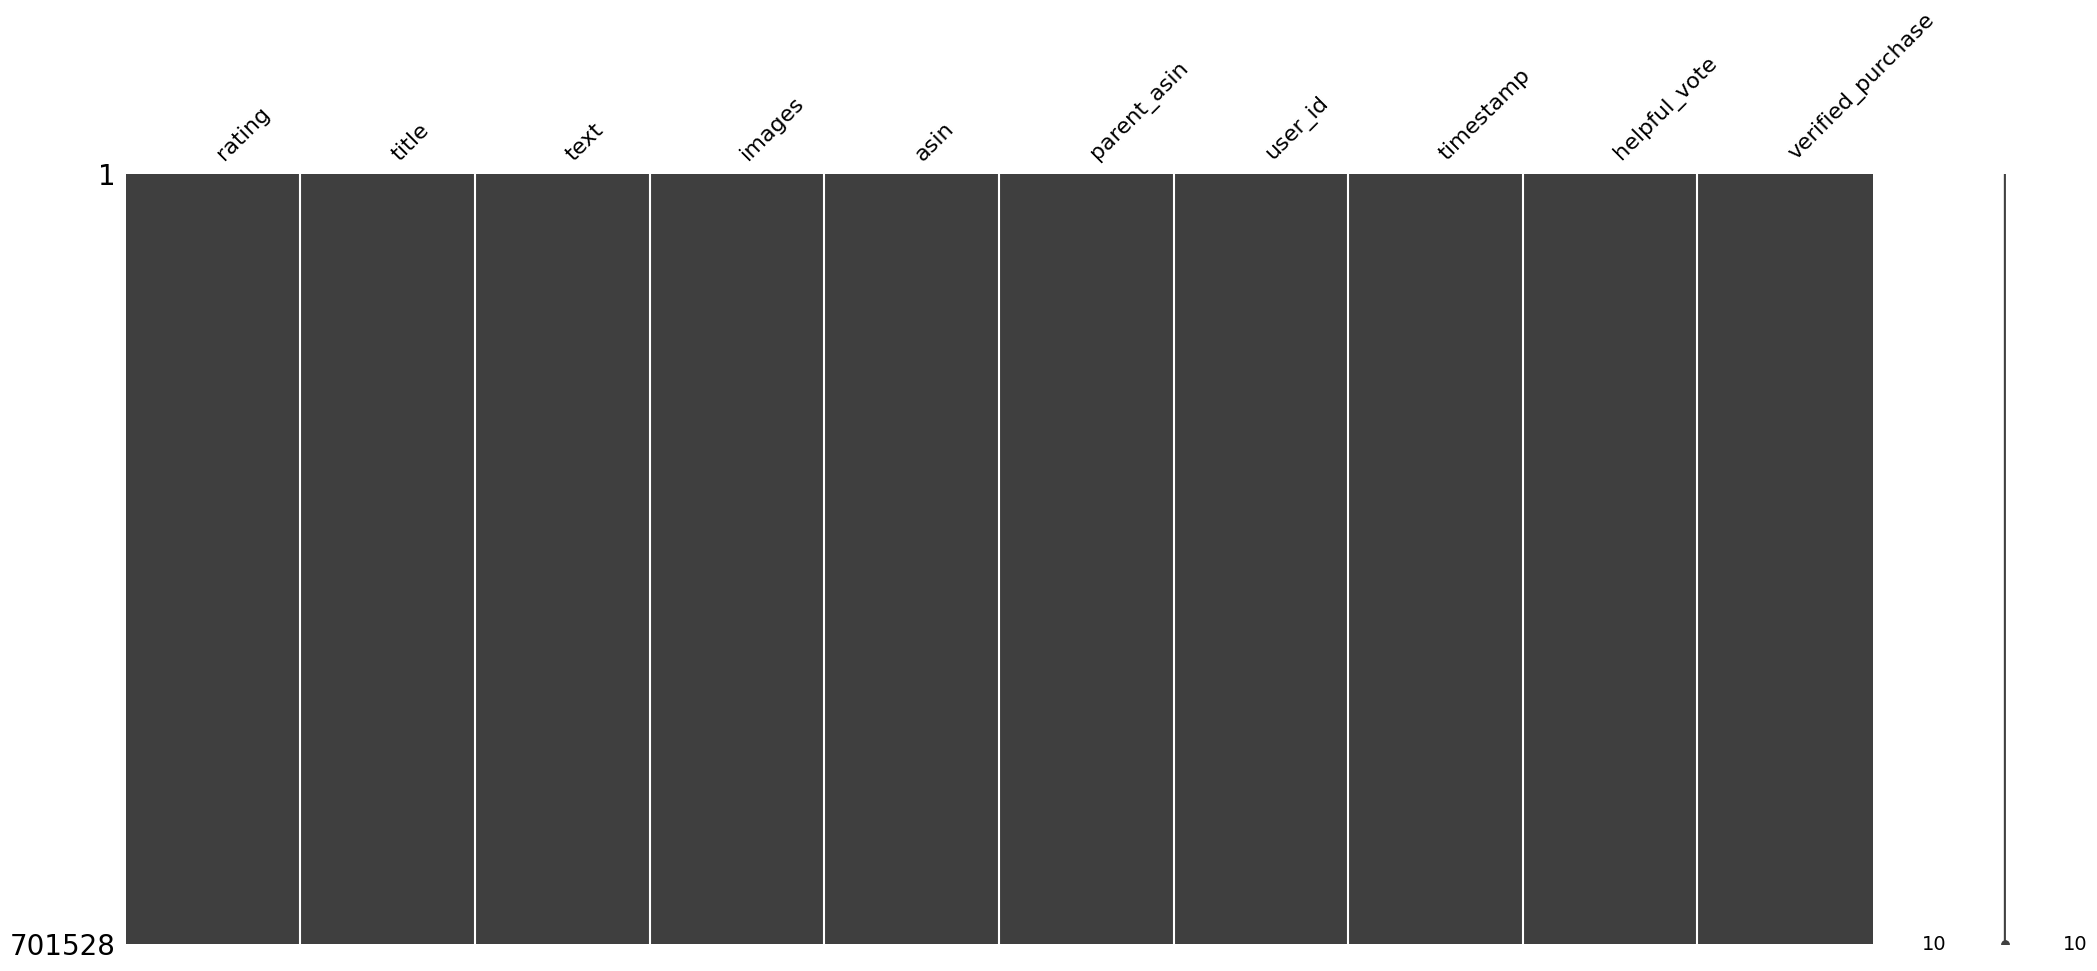

In [ ]:
# Plot missing values as a bar chart
msno.bar(df_reviews)
plt.show()

# Plot missing values as a matrix
msno.matrix(df_reviews)
plt.show()

# Statistical Analysis #


ANOVA Results:
F-statistic: 33.4244, p-value: 0.0000000000
F_onewayResult(statistic=33.42436639340204, pvalue=6.341479090032985e-28)

Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:           helpful_vote   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.78
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           7.11e-05
Time:                        21:15:33   Log-Likelihood:            -2.1877e+06
No. Observations:              701528   AIC:                         4.375e+06
Df Residuals:                  701526   BIC:                         4.375e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

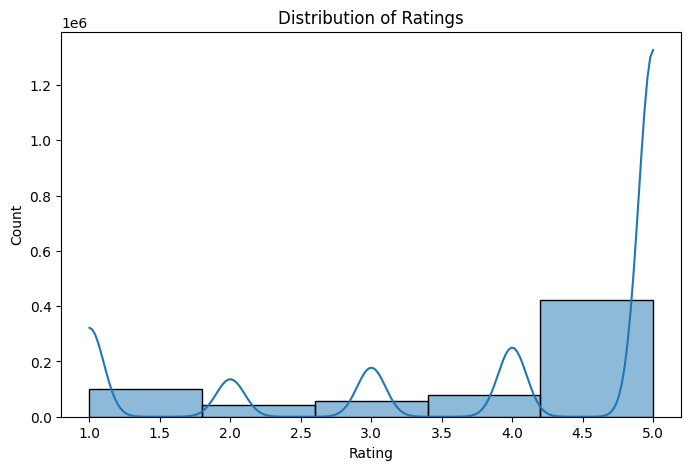

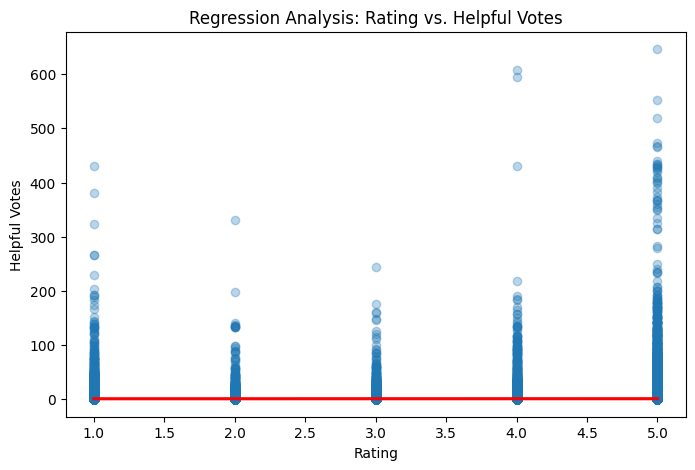

In [ ]:
# Ensure necessary columns exist
if 'rating' in df_reviews.columns and 'helpful_vote' in df_reviews.columns:
    df_analysis = df_reviews[['rating', 'helpful_vote']].dropna()

    # Convert rating to integer
    df_analysis['rating'] = df_analysis['rating'].astype(int)

    # One-Way ANOVA: Test if helpful votes vary significantly across ratings
    unique_ratings = df_analysis['rating'].nunique()
    if unique_ratings > 1:
        anova_result = stats.f_oneway(*[df_analysis[df_analysis['rating'] == rate]['helpful_vote'] for rate in df_analysis['rating'].unique()])
        print("\nANOVA Results:")
        print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.10f}")
        print(anova_result)
    else:
        print("Not enough unique rating categories for ANOVA.")

    # Linear Regression: Predict helpful votes using rating
    X = sm.add_constant(df_analysis['rating'])  # Add intercept
    y = df_analysis['helpful_vote']
    model = sm.OLS(y, X).fit()

    print("\nLinear Regression Summary:")
    print(model.summary())

    # Plot Rating Distribution
    plt.figure(figsize=(8,5))
    sns.histplot(df_analysis['rating'], bins=5, kde=True)
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Ratings')
    plt.show()

    # Scatter Plot with Regression Line
    plt.figure(figsize=(8,5))
    sns.regplot(x=df_analysis['rating'], y=df_analysis['helpful_vote'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.xlabel('Rating')
    plt.ylabel('Helpful Votes')
    plt.title('Regression Analysis: Rating vs. Helpful Votes')
    plt.show()

else:
    print("Rating and helpful_vote columns not found in dataset.")


# RQ1 20K Reviews #

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from datasets import load_dataset
import itertools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import pipeline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

# Download required NLTK data
nltk.download('vader_lexicon')

# Updated product categories with available dataset configuration names.
categories = {
    "Beauty": "raw_review_All_Beauty",
    "Electronics": "raw_review_Electronics",
    "Books": "raw_review_Books",
    "Home Appliances": "raw_review_Home_and_Kitchen"
}

# Container to hold DataFrames from each category
dfs = []

# Loop over each category and load a subset of data (1000 reviews per category) using streaming mode.
for cat, config in categories.items():
    try:
        # Load the dataset in streaming mode.
        dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", config, trust_remote_code=True, streaming=True)
        # Use .take(1000) to only get the first 1000 records
        subset = dataset["full"].take(5000)
        # Convert the streaming subset to a list then DataFrame
        df = pd.DataFrame(list(subset))
        df["category"] = cat
        dfs.append(df)
        print(f"Loaded {len(df)} records for category: {cat}")
    except Exception as e:
        print(f"Error loading category {cat}: {e}")

# Combine the data from all categories into a single DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Data Cleaning:
# Remove reviews with missing text and very short reviews.
df_all = df_all[df_all["text"].notnull()]
df_all = df_all[df_all["text"].str.len() > 20]

# Compute review length (number of words) for further analysis.
df_all["review_length"] = df_all["text"].apply(lambda x: len(x.split()))

# Initialize sentiment analyzers
sid = SentimentIntensityAnalyzer()
bert_analyzer = pipeline("sentiment-analysis", device=0)

# Define functions for sentiment scoring
def get_vader_score(text):
    return sid.polarity_scores(text)["compound"]

def get_textblob_score(text):
    return TextBlob(text).sentiment.polarity

def get_bert_score(text):
    try:
        # Limit text length for BERT to the first 512 characters.
        result = bert_analyzer(text[:512])
        # Convert result to a continuous score: positive scores remain; negative scores become negative.
        label = result[0]["label"]
        score = result[0]["score"]
        return score if label == "POSITIVE" else -score
    except Exception as e:
        return np.nan

# Compute sentiment scores using each method
print("Computing sentiment scores...")
df_all["vader_score"] = df_all["text"].apply(get_vader_score)
df_all["textblob_score"] = df_all["text"].apply(get_textblob_score)
df_all["bert_score"] = df_all["text"].apply(get_bert_score)

# Classify sentiment using VADER score based on thresholds:
# Positive: > 0.5, Neutral: between -0.5 and 0.5, Negative: < -0.5.
def classify_sentiment(score):
    if score > 0.5:
        return "Positive"
    elif score < -0.5:
        return "Negative"
    else:
        return "Neutral"

df_all["sentiment_category"] = df_all["vader_score"].apply(classify_sentiment)

# Compute helpfulness ratio.
# If the dataset provides a "total_vote" column, compute ratio = helpful_vote/total_vote.
# Otherwise, use helpful_vote as a proxy.
if "total_vote" in df_all.columns:
    df_all["helpfulness_ratio"] = df_all.apply(
        lambda row: row["helpful_vote"] / row["total_vote"] if row["total_vote"] > 0 else np.nan,
        axis=1
    )
else:
    df_all["helpfulness_ratio"] = df_all["helpful_vote"]

# Check the first few rows
print("Sample data after processing:")
print(df_all.head())

# -----------------------
# Statistical Analysis
# -----------------------

# Descriptive statistics of VADER sentiment scores by category
stats_by_cat = df_all.groupby("category")["vader_score"].describe()
print("\nDescriptive statistics for VADER sentiment scores by category:")
print(stats_by_cat)

# Group the data by category for statistical testing
groups = [group["vader_score"].values for name, group in df_all.groupby("category")]
if len(groups) > 1:
    # Perform one-way ANOVA to test if sentiment scores differ by category
    anova_result = stats.f_oneway(*groups)
    print("\nANOVA test for VADER sentiment scores across categories:")
    print(anova_result)
else:
    print("Not enough groups to perform ANOVA test.")

# Perform non-parametric Kruskal-Wallis test
kruskal_result = stats.kruskal(*groups)
print("\nKruskal-Wallis test for VADER sentiment scores across categories:")
print(kruskal_result)

# -----------------------
# Regression Analysis
# -----------------------

# Prepare data for regression: Predict helpfulness using sentiment and review length.
# Drop rows with missing values in the relevant columns.
df_reg = df_all.dropna(subset=["helpfulness_ratio", "vader_score", "review_length"])
X = df_reg[["vader_score", "review_length"]]
y = df_reg["helpfulness_ratio"]

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("\nLinear Regression Results:")
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
print("R^2 Score:", lin_reg.score(X, y))

# Random Forest Regression for helpfulness prediction
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)
print("\nRandom Forest Regression R^2 Score:", rf_reg.score(X, y))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Loaded 5000 records for category: Beauty
Loaded 5000 records for category: Electronics
Loaded 5000 records for category: Books


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Loaded 5000 records for category: Home Appliances


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Computing sentiment scores...


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Sample data after processing:
   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
5     4.0                               Pretty Color   
6     5.0                                      Handy   

                                                text  \
0  This spray is really nice. It smells really go...   
1  This product does what I need it to do, I just...   
2                          Smells good, feels great!   
5  The polish was quiet thick and did not apply s...   
6  Great for many tasks.  I purchased these for m...   

                                              images        asin parent_asin  \
0                                                 []  B00YQ6X8EO  B00YQ6X8EO   
1                                                 []  B081TJ8YS3  B081TJ8YS3   
2                                                 []  B0

# RQ2 20K reviews #

In [ ]:
from datasets import load_dataset
from itertools import islice
import numpy as np
import pandas as pd
import nltk
from nltk import pos_tag, word_tokenize
from textblob import TextBlob
import re
import warnings
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Define product categories and dataset configurations
categories = {
    "Beauty": "raw_review_All_Beauty",
    "Electronics": "raw_review_Electronics",
    "Books": "raw_review_Books",
    "Home Appliances": "raw_review_Home_and_Kitchen"
}

# Container for DataFrames
dfs = []
sample_size = 5000  # 5000 reviews per category

# Load 5000 reviews per category using streaming mode
for cat, config in categories.items():
    try:
        dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", config, trust_remote_code=True, streaming=True)
        data = dataset["full"]
        df = pd.DataFrame(list(islice(data, sample_size)))
        df["category"] = cat
        dfs.append(df)
        print(f"Loaded {len(df)} records for category: {cat}")
    except Exception as e:
        print(f"Error loading category {cat}: {e}")

# Combine the data from all categories into a single DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Data Cleaning: Remove reviews with missing text and very short reviews.
df_all = df_all[df_all["text"].notnull()]
df_all = df_all[df_all["text"].str.len() > 20]

# Compute review length (number of words)
df_all["review_length"] = df_all["text"].apply(lambda x: len(x.split()))

# Function to extract linguistic features from text
def extract_linguistic_features(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    # Count adjectives (JJ), adverbs (RB), nouns (NN, NNS, NNP, NNPS), verbs (VB, VBD, VBG, VBN, VBP, VBZ)
    adj_count = sum(1 for word, tag in pos_tags if tag.startswith("JJ"))
    adv_count = sum(1 for word, tag in pos_tags if tag.startswith("RB"))
    noun_count = sum(1 for word, tag in pos_tags if tag.startswith("NN"))
    verb_count = sum(1 for word, tag in pos_tags if tag.startswith("VB"))
    # Count punctuation marks
    punctuation_count = len(re.findall(r'[^\w\s]', text))
    # Compute subjectivity and polarity using TextBlob
    blob = TextBlob(text)
    subjectivity = blob.sentiment.subjectivity
    polarity = blob.sentiment.polarity
    return pd.Series({
        "adj_count": adj_count,
        "adv_count": adv_count,
        "noun_count": noun_count,
        "verb_count": verb_count,
        "punctuation_count": punctuation_count,
        "subjectivity": subjectivity,
        "polarity": polarity
    })

# Apply linguistic feature extraction
ling_features = df_all["text"].apply(extract_linguistic_features)
df_all = pd.concat([df_all, ling_features], axis=1)

# Compute helpfulness ratio.
# If 'total_vote' exists, compute ratio as helpful_vote/total_vote if total_vote > 0, else set as NaN.
if "total_vote" in df_all.columns:
    df_all["helpfulness_ratio"] = df_all.apply(
        lambda row: row["helpful_vote"] / row["total_vote"] if row["total_vote"] > 0 else np.nan,
        axis=1
    )
else:
    df_all["helpfulness_ratio"] = df_all["helpful_vote"]

print("Linguistic features extracted (sample):")
print(df_all[["text", "review_length", "adj_count", "adv_count", "noun_count", "verb_count",
              "punctuation_count", "subjectivity", "polarity", "helpfulness_ratio"]].head())

# Prepare data for regression analysis: predicting helpfulness using linguistic features
features = ["review_length", "adj_count", "adv_count", "noun_count", "verb_count",
            "punctuation_count", "subjectivity", "polarity"]

df_reg = df_all.dropna(subset=["helpfulness_ratio"] + features)
X = df_reg[features]
y = df_reg["helpfulness_ratio"]

# Run Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("\nRegression Coefficients for predicting helpfulness ratio:")
for feat, coef in zip(features, lin_reg.coef_):
    print(f"{feat}: {coef}")
print("Intercept:", lin_reg.intercept_)
print("R^2 Score:", lin_reg.score(X, y))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Loaded 5000 records for category: Beauty
Loaded 5000 records for category: Electronics
Loaded 5000 records for category: Books
Loaded 5000 records for category: Home Appliances
Linguistic features extracted (sample):
                                                text  review_length  \
0  This spray is really nice. It smells really go...             61   
1  This product does what I need it to do, I just...             47   
2                          Smells good, feels great!              4   
5  The polish was quiet thick and did not apply s...             24   
6  Great for many tasks.  I purchased these for m...             22   

   adj_count  adv_count  noun_count  verb_count  punctuation_count  \
0        5.0        3.0        10.0        16.0               10.0   
1        3.0        1.0         8.0        17.0                6.0   
2        3.0        0.0         1.0         0.0                2.0   
5        5.0        3.0         3.0         6.0                2.0   
6     

# RQ3 20K reviews #

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from textblob import TextBlob
import re
from datasets import load_dataset
from itertools import islice
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Define product categories and sample size (1,000 reviews per category)
categories = {
    "Beauty": "raw_review_All_Beauty",
    "Electronics": "raw_review_Electronics",
    "Books": "raw_review_Books",
    "Home Appliances": "raw_review_Home_and_Kitchen"
}
sample_size = 5000  # 5,000 reviews per category

dfs = []
for cat, config in categories.items():
    try:
        dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", config, trust_remote_code=True, streaming=True)
        data = dataset["full"]
        df_cat = pd.DataFrame(list(islice(data, sample_size)))
        df_cat["category"] = cat
        dfs.append(df_cat)
        print(f"Loaded {len(df_cat)} records for category: {cat}")
    except Exception as e:
        print(f"Error loading category {cat}: {e}")

# Combine all categories into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Data Cleaning: Remove reviews with missing text and very short reviews (less than 20 words)
df_all = df_all[df_all["text"].notnull()]
df_all = df_all[df_all["text"].str.split().apply(len) > 20]

# Compute review length (number of words)
df_all["review_length"] = df_all["text"].apply(lambda x: len(x.split()))

# Define a function to extract linguistic features from text
def extract_linguistic_features(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    # Count adjectives, adverbs, nouns, and verbs using their POS tags
    adj_count = sum(1 for _, tag in pos_tags if tag.startswith("JJ"))
    adv_count = sum(1 for _, tag in pos_tags if tag.startswith("RB"))
    noun_count = sum(1 for _, tag in pos_tags if tag.startswith("NN"))
    verb_count = sum(1 for _, tag in pos_tags if tag.startswith("VB"))
    # Count punctuation marks using regex
    punctuation_count = len(re.findall(r'[^\w\s]', text))
    # Use TextBlob to compute sentiment subjectivity and polarity
    blob = TextBlob(text)
    subjectivity = blob.sentiment.subjectivity
    polarity = blob.sentiment.polarity
    return pd.Series({
        "adj_count": adj_count,
        "adv_count": adv_count,
        "noun_count": noun_count,
        "verb_count": verb_count,
        "punctuation_count": punctuation_count,
        "subjectivity": subjectivity,
        "polarity": polarity
    })

# Apply linguistic feature extraction on the review text
ling_features = df_all["text"].apply(extract_linguistic_features)
df_all = pd.concat([df_all, ling_features], axis=1)

# Create synthetic authenticity labels using a heuristic:
# If a review is not a verified purchase or its length is less than 30 words, label it as fake (0); otherwise, label as authentic (1).
def label_authenticity(row):
    if "verified_purchase" in row and not row["verified_purchase"]:
        return 0  # Fake
    if row["review_length"] < 30:
        return 0  # Fake
    return 1  # Authentic

df_all["authenticity"] = df_all.apply(label_authenticity, axis=1)

print("Label distribution:")
print(df_all["authenticity"].value_counts())

# Select features for classification:
# We use review length, linguistic features, and verified purchase status (if available).
feature_cols = ["review_length", "adj_count", "adv_count", "noun_count",
                "verb_count", "punctuation_count", "subjectivity", "polarity"]

if "verified_purchase" in df_all.columns:
    df_all["verified_purchase_flag"] = df_all["verified_purchase"].astype(int)
    feature_cols.append("verified_purchase_flag")

X = df_all[feature_cols]
y = df_all["authenticity"]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier to distinguish authentic vs. fake reviews
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and print classification metrics
y_pred = clf.predict(X_test)
print("\nClassification Report for Authenticity Detection:")
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Loaded 5000 records for category: Beauty
Loaded 5000 records for category: Electronics
Loaded 5000 records for category: Books
Loaded 5000 records for category: Home Appliances
Label distribution:
authenticity
0    8548
1    5554
Name: count, dtype: int64

Classification Report for Authenticity Detection:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00      1147

    accuracy                           1.00      2821
   macro avg       1.00      1.00      1.00      2821
weighted avg       1.00      1.00      1.00      2821

